### Import Packages and Reading of Data

In [38]:
import time
import warnings
import pickle

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [39]:
# Reading of Excel
dataset = pd.read_csv('cleaned_others_dataset.csv')

In [40]:
dataset

,verified,location,followers_count,following_count,tweet_count,isFraud,un_no_of_char,un_special_char,un_uppercase,name_no_of_char,name_special_char,name_uppercase,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88127,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88128,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88129,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88130,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Feature Engineering

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["isFraud"]), dataset["isFraud"], test_size = 0.2, random_state=101)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (70505, 35) (70505,)
Test set: (17627, 35) (17627,)


In [42]:
scaler = StandardScaler()
fitted = scaler.fit(X_train)
X_train_fitted = fitted.transform(X_train)
X_test_fitted = fitted.transform(X_test)

In [43]:
x_train = pd.DataFrame(X_train_fitted, columns = X_train.columns)
x_test = pd.DataFrame(X_test_fitted, columns = X_test.columns)
y_train = pd.DataFrame(y_train, columns = ["isFraud"])
y_test = pd.DataFrame(y_test, columns = ["isFraud"])

### Charts

In [44]:
def feature_chart(feature_importance_df, model_type):
#     feature_importance_df = pd.DataFrame(model.coef_.T, x_train.columns.T,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    fig = feature_importance_df.plot(kind="barh", figsize=(12, 15))
    bg = fig.patch
    bg.set_facecolor("white")
    plt.gca().invert_yaxis()
    plt.grid()
#     plt.savefig(f'Charts\\{model_type} Feature Importance.png', dpi=300, facecolor=fig.get_facecolor())
    plt.show()

### Logistic Regression (Baseline)
* Model
* Error Metrics
* Plot for Feature Importance

#### Model

In [45]:
# Model
log_regression = LogisticRegression()
log_model = log_regression.fit(x_train, y_train)

In [46]:
# Save the model to disk
filename = '01 Logistic Regression.sav'
pickle.dump(log_model, open(filename, 'wb'))

# Load the model from disk
# results_random = pickle.load(open(filename, 'rb'))

In [47]:
# R-Squared
log_model.score(x_train, y_train)

0.7960144670590739

In [48]:
# y_prediction
y_pred = log_model.predict(x_test)

In [49]:
# Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')

MAE: 0.20360810120837353
RMSE: 0.45122954381154334
F1-score: 0.3330236015610481
Precision: 0.6153846153846154
Recall: 0.22828025477707006


#### Feature Importance

In [50]:
# Feature importance
feature = pd.DataFrame(log_model.coef_.T, x_train.columns.T, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
feature

,Feature Importance
tweet_count,0.503690
year,0.419111
des_external_links,0.313411
following_count,0.107227
Oct,0.058129
name_no_of_char,0.046259
Dec,0.044965
Fri,0.032282
Nov,0.022532
Sat,0.016803


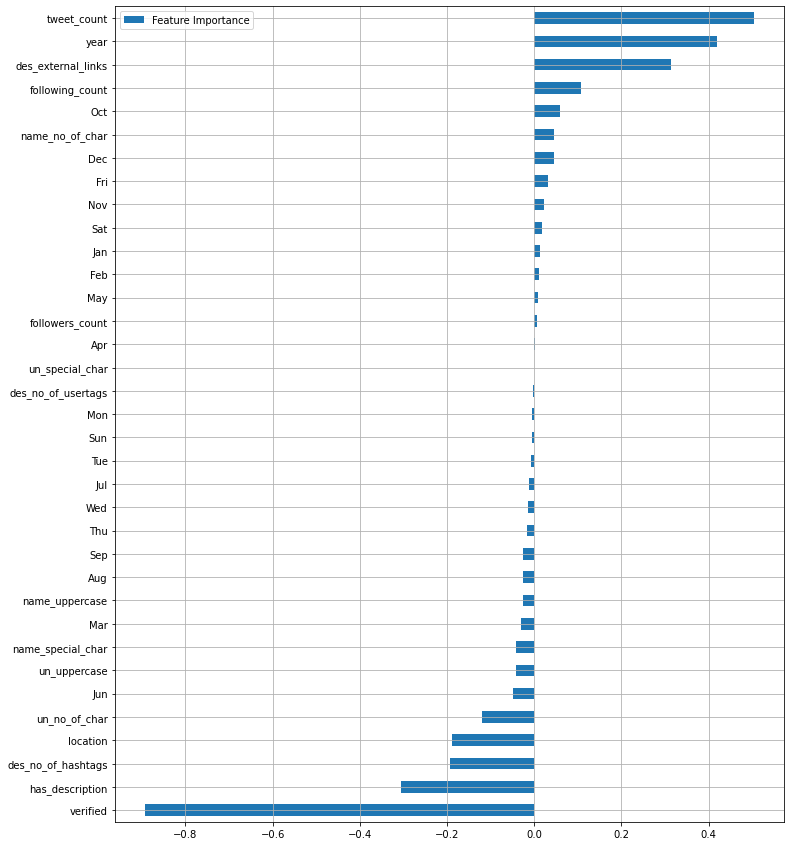

In [51]:
# Feature importance
feature_chart(feature, "Logistic Regression")